In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
plt.style.use("style.mplstyle")
sns.set_palette("colorblind")

In [14]:
tess_df = pd.read_csv('tess_dat/tesstimate.csv', header=None)
ogle_df = pd.read_csv('tess_dat/ogle_zone.csv', header=None)

In [15]:
m_vals_tess = tess_df.values[:,0]
f_bound_vals_tess = tess_df.values[:,1]

In [17]:
m_vals_ogle = ogle_df.values[:,0]
f_bound_vals_ogle = ogle_df.values[:,1]

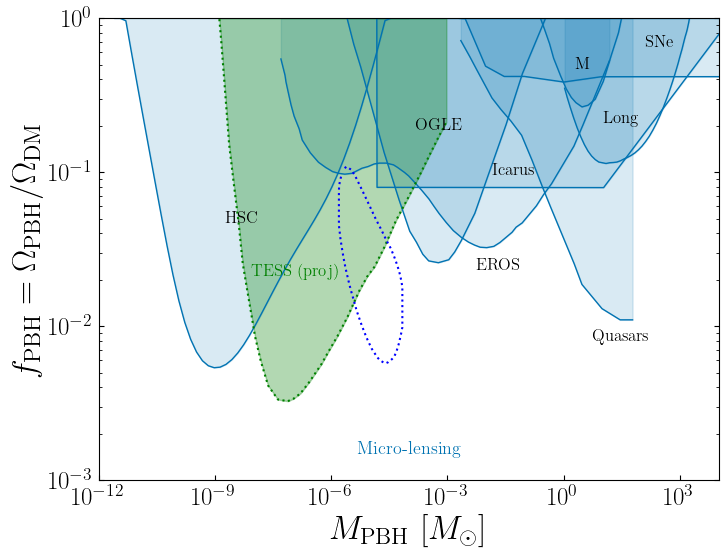

In [41]:
#General options
plot_SGWB_range = True

#Default values, overridden if you pass in command line arguments
# listfile_default = "listfiles/bounds_microlensing.txt" 
outfile_default = "plots/PBHbounds_microlensing_square.pdf"

listfile= 'bounds_microlensing.txt'
outfile = outfile_default

alpha_val = 0.15

bounds = np.loadtxt(listfile, usecols=(0,), dtype=str)
colors = np.loadtxt(listfile, usecols=(1,), dtype=str)
lines = np.loadtxt(listfile, usecols=(2,), dtype=str)
xlist = np.loadtxt(listfile, usecols=(3,))
ylist = np.loadtxt(listfile, usecols=(4,))
anglist = np.loadtxt(listfile, usecols=(5,))
labellist = np.loadtxt(listfile, usecols=(6,), dtype=str)

Mgrid = np.geomspace(1e-12, 1e5, 1000)
envelope = 1.0 + 0.0*Mgrid

def addConstraint(boundID, col='gray',x = 1e-30,y=1e-4,ang=0, linestyle='-', labeltext=''):
    m, f = np.loadtxt('bounds/' + boundID + '.txt', unpack=True)
    if (boundID != "OGLE-hint"):
        plt.fill_between(m , np.clip(f, 0,1), 1, alpha=alpha_val, color=col)
    linewidth = 1.0
    if (boundID in ["Microlensing", "Evaporation"]):
        linewidth=2.0
    plt.plot(m, np.clip(f, 0,1), color=col, lw=linewidth, linestyle=linestyle)
    
    if (x > 1e-20):
        plt.text(x, y, labeltext.replace("_", " "), rotation=ang, fontsize=12, ha='center', va='center')
        
    interped_lim = np.interp(Mgrid, m, np.clip(f, 0,1), left=1, right=1)
    envelope[interped_lim < envelope] = interped_lim[interped_lim < envelope]
    

#-------------------------------------------    
    
    
plt.figure(figsize=(8,6))

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(pad=5)

for i in range(len(bounds)):  
        addConstraint(bounds[i], col = colors[i], x = xlist[i], y = ylist[i], ang=anglist[i], linestyle=lines[i], labeltext=labellist[i])



#Plotting stuff
plt.axhspan(1, 1.5, facecolor='grey', alpha=0.5)
    
plt.ylim(1e-3, 1)

xmin = 1e-12
xmax = 1e4
plt.xlim(xmin, xmax)

ticks_minor = np.geomspace(1e-18, 1e4, 23)
ticks_minor = ticks_minor[(xmin <= ticks_minor) & (ticks_minor <= xmax)]
#print(ticks_minor)
ax.set_xticks(ticks_minor,minor=True)
ax.set_xticklabels([], minor=True)
    
ax.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
plt.ylabel(r'$f_\mathrm{PBH} = \Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$')

# ax_top = ax.twiny()
# ax_top.xaxis.tick_top()
# ax_top.set_xscale('log')
# ax_top.set_xlim(ax.get_xlim())
# ax_top.set_xlabel(r'$M_\mathrm{CO}$ [g]', labelpad=7)

g_to_Msun = 1/1.989e+33

g_ticks_minor = np.geomspace(1e15, 1e37, 23)
g_ticks_minor = g_ticks_minor[(xmin < g_to_Msun*g_ticks_minor) & (g_to_Msun*g_ticks_minor < xmax)]
g_ticks = g_ticks_minor[::3]


# g_tick_labels = [r"$10^{" + str(int(np.log10(x))) +"}$" for x in g_ticks]

# ax_top.set_xticks(g_ticks*g_to_Msun)
# ax_top.set_xticklabels(g_tick_labels)
# ax_top.xaxis.set_tick_params(pad=0)

# ax_top.set_xticks(g_ticks_minor*g_to_Msun,minor=True)
# ax_top.set_xticklabels([],minor=True)

ax.text(0.5, 0.05, "Micro-lensing", va = "bottom", ha = "center", color='C0',  transform=ax.transAxes)

plt.loglog(m_vals_tess, f_bound_vals_tess, 'green', ls=':')
plt.fill_between(m_vals_tess, f_bound_vals_tess, 1, alpha=0.3, color='green')
plt.text(1.2e-7, 2e-2, "TESS (proj)",fontsize=12, ha='center', va='bottom', rotation = 0, color='green')


plt.loglog(m_vals_ogle, f_bound_vals_ogle, 'blue', ls=':')


# plt.savefig(outfile, bbox_inches='tight')
    
    
#Save envelope to file
headertxt = "Envelope of microlensing bounds: " + ", ".join(bounds)
headertxt += "\n Columns: PBH mass [Muns], PBH fraction f_PBH"
# np.savetxt("bounds/Microlensing.txt", np.c_[Mgrid, envelope], header=headertxt)
# plt.savefig("figures/tess_pbh_projections.pdf", bbox_inches='tight')
plt.savefig("figures/tesstimates.pdf", bbox_inches='tight')

    
plt.show()

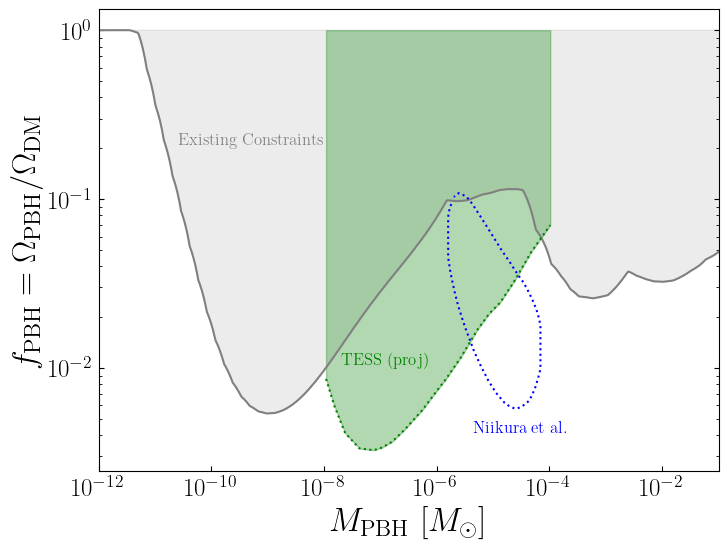

In [90]:
Mgrid = np.geomspace(1e-12, 1e5, 1000)
# envelope = 1.0 + 0.0*Mgrid
envelope = 1.0 + 0.5*Mgrid

def computeEnvelope(boundID):
    m, f = np.loadtxt('bounds/' + boundID + '.txt', unpack=True)
    interped_lim = np.interp(Mgrid, m, np.clip(f, 0,1), left=1, right=1)
    envelope[interped_lim < envelope] = interped_lim[interped_lim < envelope]

plt.figure(figsize=(8,6))

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.tick_bottom()
ax.xaxis.set_tick_params(pad=5)

# Compute the envelope for each constraint
for i in range(len(bounds)):
    if (bounds[i] == "Icarus"):
        continue
    computeEnvelope(bounds[i])

# Plot the resulting envelope
plt.fill_between(Mgrid, envelope, 1, color='gray', alpha=alpha_val)
plt.plot(Mgrid, envelope, color='gray')

idx=10
idx2=-4
plt.loglog(m_vals_tess[idx:idx2], f_bound_vals_tess[idx:idx2], 'green', ls=':')
plt.fill_between(m_vals_tess[idx:idx2], f_bound_vals_tess[idx:idx2], 1, alpha=0.3, color='green')

plt.text(1.2e-7, 1e-2, "TESS (proj)",fontsize=12, ha='center', va='bottom', rotation = 0, color='green')

plt.text(3e-5, 4e-3, "Niikura et al.",fontsize=12, ha='center', va='bottom', rotation = 0, color='blue')
plt.text(5e-10, 2e-1, "Existing Constraints",fontsize=12, ha='center', va='bottom', rotation = 0, color='Gray')



plt.xlim(1e-12, 1e-1)

ax.set_xlabel(r'$M_\mathrm{PBH}$ [$M_\odot$]')
plt.ylabel(r'$f_\mathrm{PBH} = \Omega_\mathrm{PBH}/\Omega_\mathrm{DM}$')


plt.loglog(m_vals_ogle, f_bound_vals_ogle, 'blue', ls=':')
plt.savefig("figures/tesstimates.pdf", bbox_inches='tight')

